# Traffic Light Detection

## Imports

In [1]:
import numpy as np
import os
import sys
import tensorflow as tf
import time

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [3]:
sim_model_path = 'model_frozen_sim/frozen_inference_graph.pb'
real_model_path = 'model_frozen_real/frozen_inference_graph.pb'
labels_path = 'label_map.pbtxt'
image_size = (12, 8)

In [4]:
label_map = label_map_util.load_labelmap(labels_path)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=4, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': u'Red'}, 2: {'id': 2, 'name': u'Yellow'}, 3: {'id': 3, 'name': u'Green'}, 4: {'id': 4, 'name': u'off'}}


In [5]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [6]:
from glob import glob

## Functions

In [7]:
def import_graph(model_path):
    detection_graph = tf.Graph()
    
    with detection_graph.as_default():
      od_graph_def = tf.GraphDef()
    
      with tf.gfile.GFile(model_path, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
    return detection_graph
        
    
def load_test_images(directory):
    print(os.path.join(directory, '*.jpg'))
    image_paths = glob(os.path.join(directory, '*.jpg'))
    print("Length of test images:", len(image_paths))
    return image_paths

In [8]:
def predict(detection_graph, image_paths):
    with detection_graph.as_default():
        with tf.Session(graph=detection_graph) as sess:
            # Definite input and output Tensors for detection_graph
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

            # Each box represents a part of the image where a particular object was detected.
            detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
            detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            for image_path in image_paths:
                image = Image.open(image_path)
                # the array based representation of the image will be used later in order to prepare the
                # result image with boxes and labels on it.
                image_np = load_image_into_numpy_array(image)
                # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
                image_np_expanded = np.expand_dims(image_np, axis=0)

                time0 = time.time()

                # Actual detection.
                (boxes, scores, classes, num) = sess.run(
                  [detection_boxes, detection_scores, detection_classes, num_detections],
                  feed_dict={image_tensor: image_np_expanded})

                time1 = time.time()

                boxes = np.squeeze(boxes)
                scores = np.squeeze(scores)
                classes = np.squeeze(classes).astype(np.int32)

                # Visualization of the results of a detection.
                vis_util.visualize_boxes_and_labels_on_image_array(
                    image_np, boxes, classes, scores,
                    category_index,
                    use_normalized_coordinates=True,
                    line_thickness=6)

                plt.figure(figsize=image_size)
                plt.imshow(image_np)
                plt.show()

                min_score_thresh = .50
                for i in range(boxes.shape[0]):
                    if scores is None or scores[i] > min_score_thresh:

                        class_name = category_index[classes[i]]['name']
                        print('{}'.format(class_name), scores[i])

                        fx =  0.97428
                        fy =  1.73205
                        perceived_width_x = (boxes[i][3] - boxes[i][1]) * 800
                        perceived_width_y = (boxes[i][2] - boxes[i][0]) * 600

                        # ymin, xmin, ymax, xmax = box
                        # depth_prime = (width_real * focal) / perceived_width
                        perceived_depth_x = ((.1 * fx) / perceived_width_x)
                        perceived_depth_y = ((.3 * fy) / perceived_width_y )

                        estimated_distance = round((perceived_depth_x + perceived_depth_y) / 2)
                        print("Distance (metres)", estimated_distance)
                        print("Time in milliseconds", (time1 - time0) * 1000, "\n")

## Detection: Simulator Test Pictures

test_images_sim/*.jpg
('Length of test images:', 12)


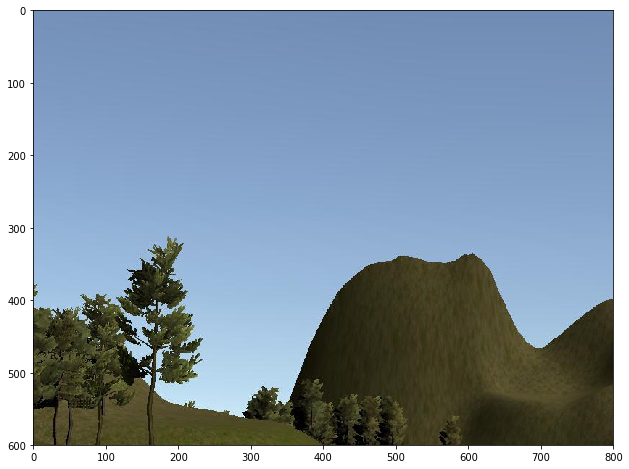

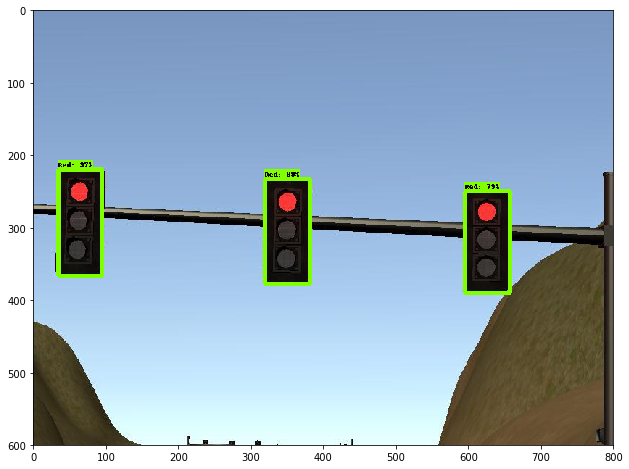

('Red', 0.9956079)
('Distance (metres)', 0.0)
('Time in milliseconds', 61.933040618896484, '\n')
('Red', 0.97172225)
('Distance (metres)', 0.0)
('Time in milliseconds', 61.933040618896484, '\n')
('Red', 0.79028445)
('Distance (metres)', 0.0)
('Time in milliseconds', 61.933040618896484, '\n')


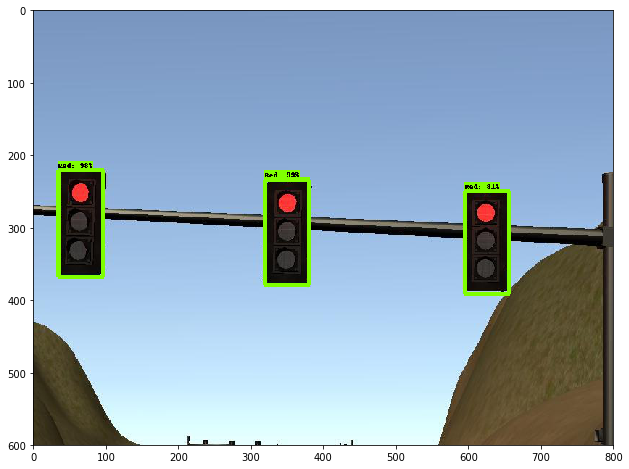

('Red', 0.9973859)
('Distance (metres)', 0.0)
('Time in milliseconds', 58.78496170043945, '\n')
('Red', 0.98768765)
('Distance (metres)', 0.0)
('Time in milliseconds', 58.78496170043945, '\n')
('Red', 0.8189244)
('Distance (metres)', 0.0)
('Time in milliseconds', 58.78496170043945, '\n')


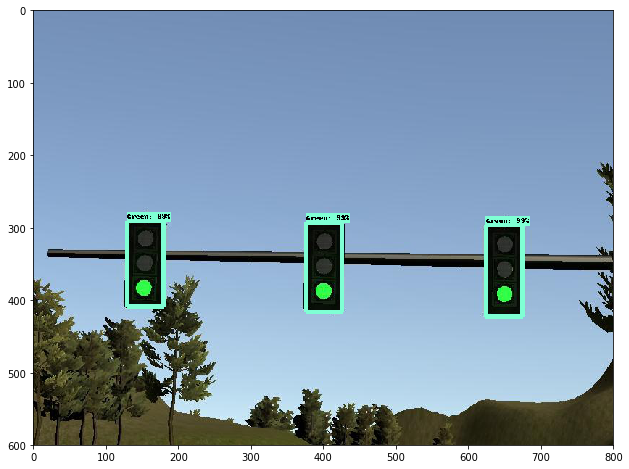

('Green', 0.9997788)
('Distance (metres)', 0.0)
('Time in milliseconds', 59.92889404296875, '\n')
('Green', 0.99973375)
('Distance (metres)', 0.0)
('Time in milliseconds', 59.92889404296875, '\n')
('Green', 0.9992306)
('Distance (metres)', 0.0)
('Time in milliseconds', 59.92889404296875, '\n')


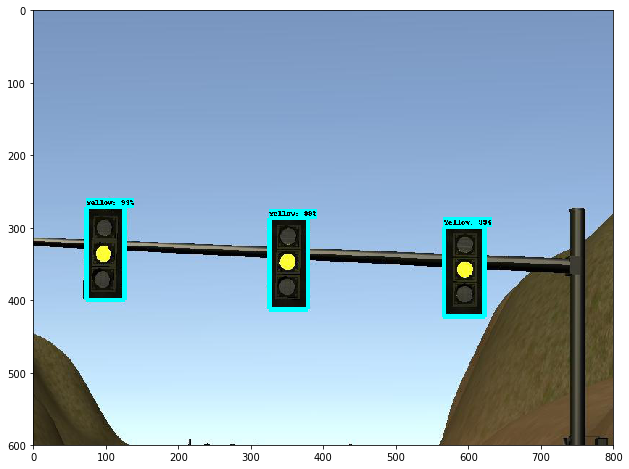

('Yellow', 0.9995617)
('Distance (metres)', 0.0)
('Time in milliseconds', 56.51116371154785, '\n')
('Yellow', 0.9976907)
('Distance (metres)', 0.0)
('Time in milliseconds', 56.51116371154785, '\n')
('Yellow', 0.9957573)
('Distance (metres)', 0.0)
('Time in milliseconds', 56.51116371154785, '\n')


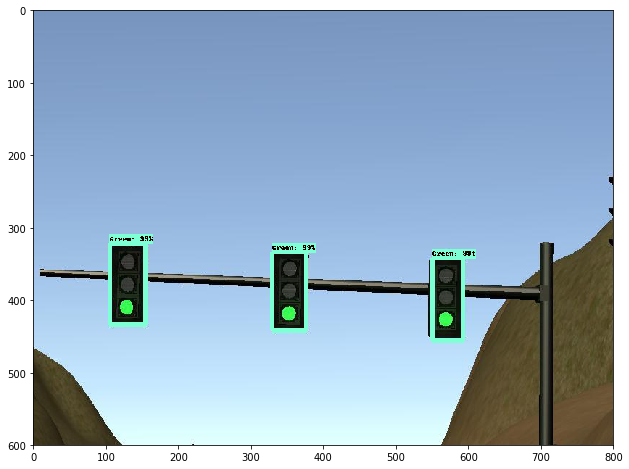

('Green', 0.9998293)
('Distance (metres)', 0.0)
('Time in milliseconds', 57.626962661743164, '\n')
('Green', 0.9995486)
('Distance (metres)', 0.0)
('Time in milliseconds', 57.626962661743164, '\n')
('Green', 0.9989723)
('Distance (metres)', 0.0)
('Time in milliseconds', 57.626962661743164, '\n')


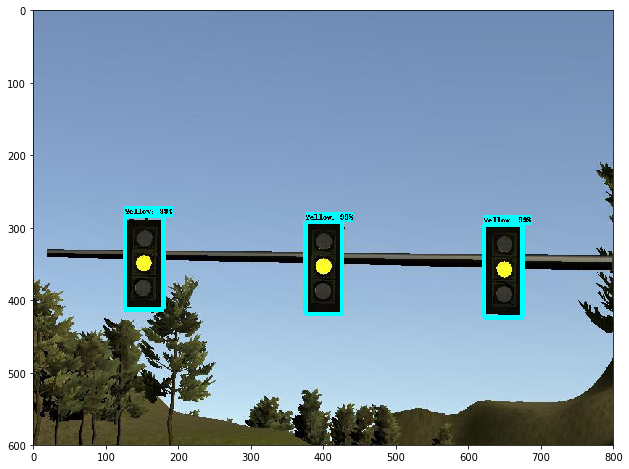

('Yellow', 0.9998311)
('Distance (metres)', 0.0)
('Time in milliseconds', 58.338165283203125, '\n')
('Yellow', 0.99976665)
('Distance (metres)', 0.0)
('Time in milliseconds', 58.338165283203125, '\n')
('Yellow', 0.9987078)
('Distance (metres)', 0.0)
('Time in milliseconds', 58.338165283203125, '\n')


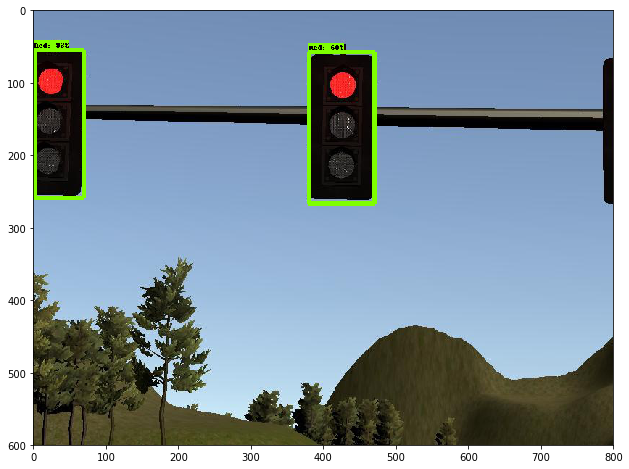

('Red', 0.9307587)
('Distance (metres)', 0.0)
('Time in milliseconds', 57.93309211730957, '\n')
('Red', 0.60050124)
('Distance (metres)', 0.0)
('Time in milliseconds', 57.93309211730957, '\n')


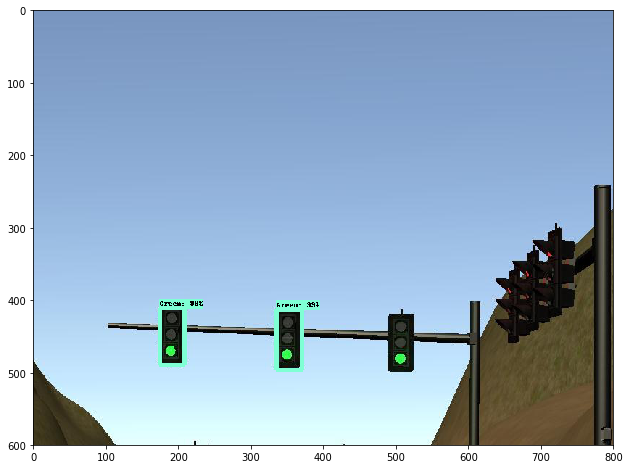

('Green', 0.9995541)
('Distance (metres)', 0.0)
('Time in milliseconds', 57.75713920593262, '\n')
('Green', 0.9969625)
('Distance (metres)', 0.0)
('Time in milliseconds', 57.75713920593262, '\n')


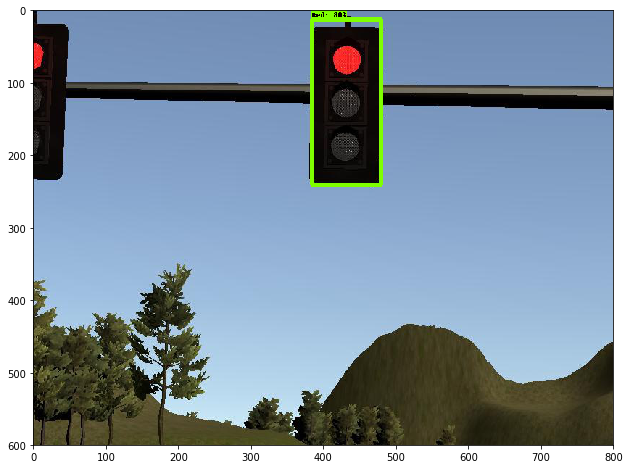

('Red', 0.8013973)
('Distance (metres)', 0.0)
('Time in milliseconds', 58.10999870300293, '\n')


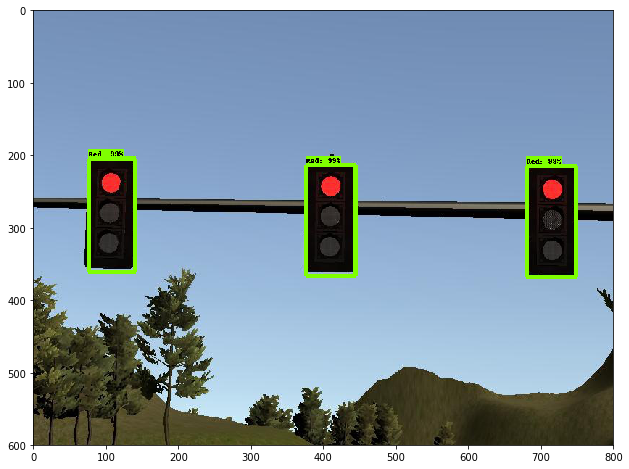

('Red', 0.99856156)
('Distance (metres)', 0.0)
('Time in milliseconds', 57.656049728393555, '\n')
('Red', 0.99659234)
('Distance (metres)', 0.0)
('Time in milliseconds', 57.656049728393555, '\n')
('Red', 0.9930051)
('Distance (metres)', 0.0)
('Time in milliseconds', 57.656049728393555, '\n')


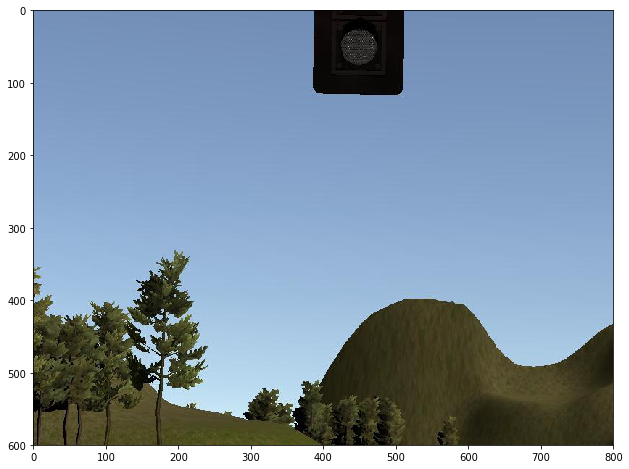

In [9]:
detection_graph = import_graph(sim_model_path)
image_paths = load_test_images("test_images_sim")
predict(detection_graph, image_paths)

## Detection: Real Test Pictures

test_images_real/*.jpg
('Length of test images:', 9)


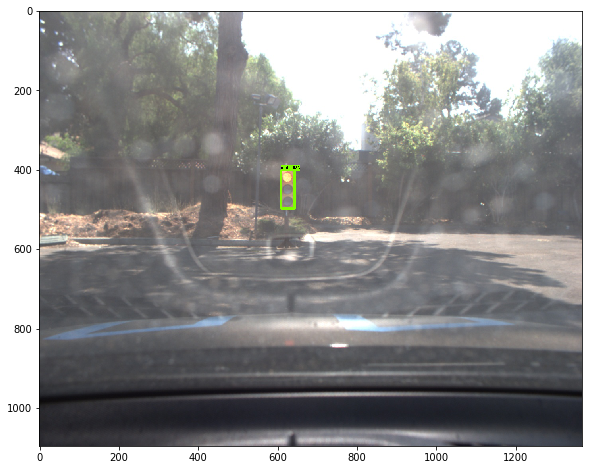

('Red', 0.895171)
('Distance (metres)', 0.0)
('Time in milliseconds', 471.3430404663086, '\n')


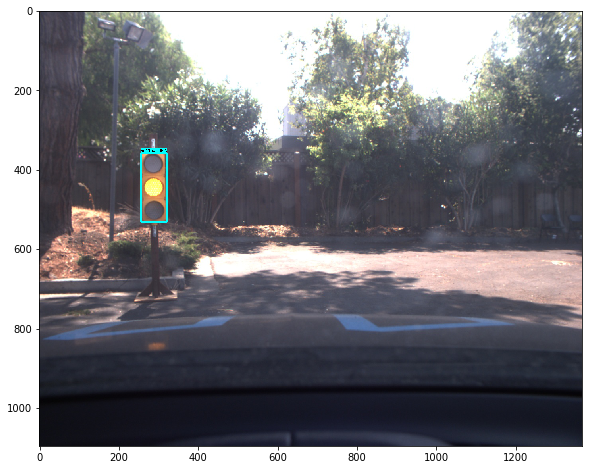

('Yellow', 0.9463165)
('Distance (metres)', 0.0)
('Time in milliseconds', 84.27691459655762, '\n')


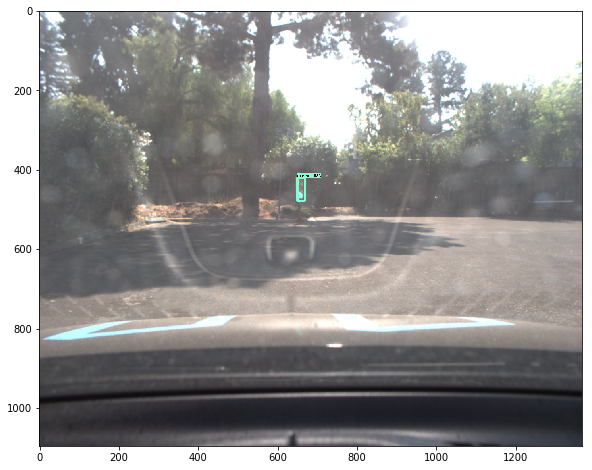

('Green', 0.98854685)
('Distance (metres)', 0.0)
('Time in milliseconds', 81.74991607666016, '\n')


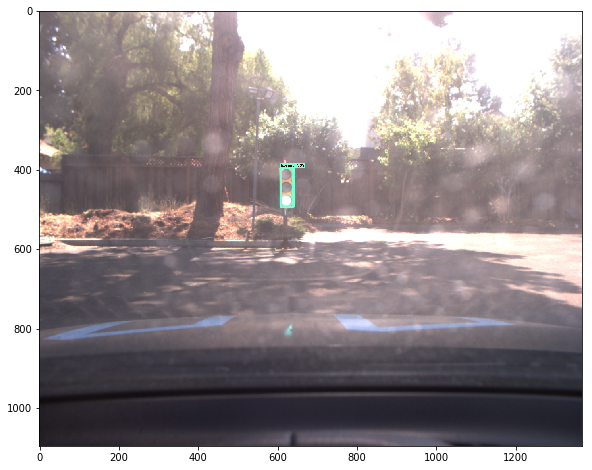

('Green', 0.99752754)
('Distance (metres)', 0.0)
('Time in milliseconds', 82.95798301696777, '\n')


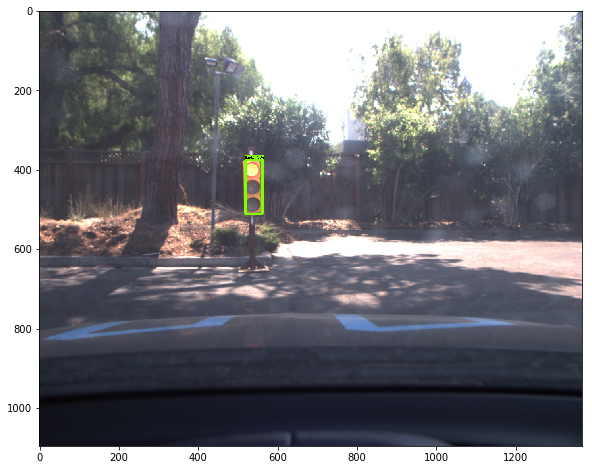

('Red', 0.99926335)
('Distance (metres)', 0.0)
('Time in milliseconds', 81.16292953491211, '\n')


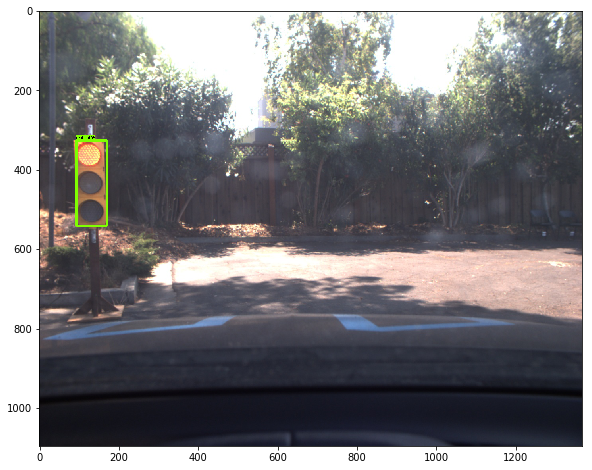

('Red', 0.83981425)
('Distance (metres)', 0.0)
('Time in milliseconds', 78.85217666625977, '\n')


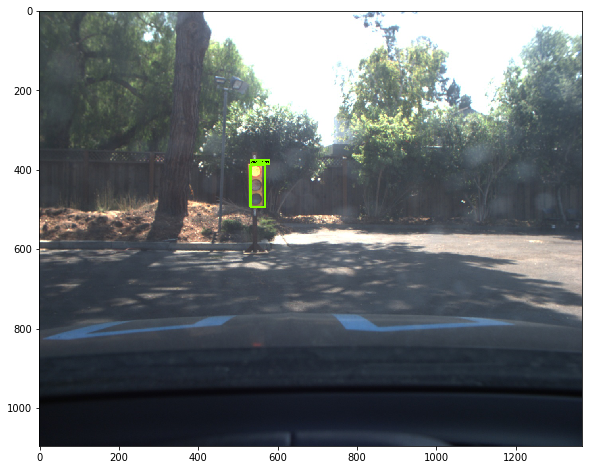

('Red', 0.9976267)
('Distance (metres)', 0.0)
('Time in milliseconds', 81.24494552612305, '\n')


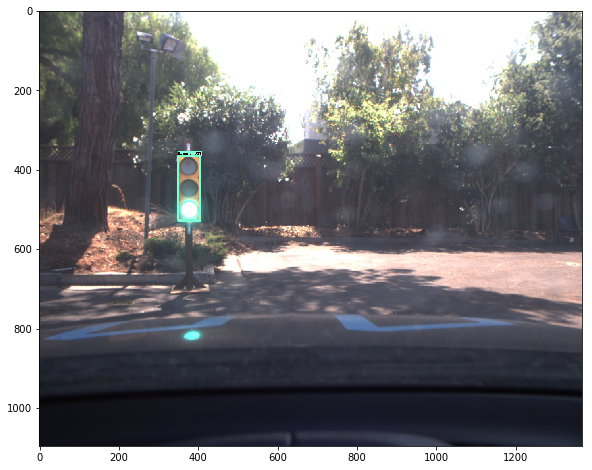

('Green', 0.99674124)
('Distance (metres)', 0.0)
('Time in milliseconds', 87.24784851074219, '\n')


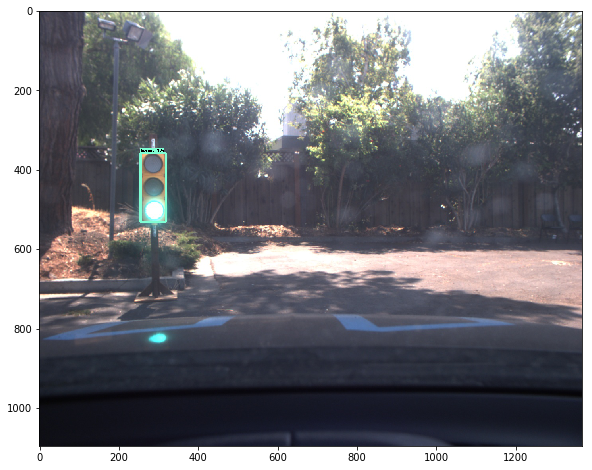

('Green', 0.9332962)
('Distance (metres)', 0.0)
('Time in milliseconds', 82.95392990112305, '\n')


In [10]:
detection_graph = import_graph(sim_model_path)
image_paths = load_test_images("test_images_real")
predict(detection_graph, image_paths)